In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

california_housing = fetch_california_housing()
X_california = california_housing.data
Y_california = california_housing.target

print("California Housing Dataset:")
print(f"X_train shape: {X_california.shape}, y_train shape: {X_california.shape}")


California Housing Dataset:
X_train shape: (20640, 8), y_train shape: (20640, 8)


#Lab Task
Reimplement the above lab on the California Housing dataset.

In [18]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X_california, Y_california, test_size = 0.2, random_state = 42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size = 0.25, random_state = 42)


In [24]:
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_val)
mse = mean_squared_error(Y_val, y_pred)
print(f"Mean Squared Error on Validation Set: {mse}")



Mean Squared Error on Validation Set: 0.4896805380482271


In [25]:
Y_test_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_test_pred)
print(f"Mean Squared Error on Test Set: {mse}")

Mean Squared Error on Test Set: 0.5779619522442472


In [35]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


X_train, X_test, Y_train, Y_test = train_test_split(X_california, Y_california, test_size=0.3, random_state=42)
num_of_folds = 5
kf = KFold(n_splits = num_of_folds, shuffle = True, random_state = 42)
model = LinearRegression()

for fold, (train_index, val_index) in enumerate(kf.split(X_train, Y_train)):
  X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
  Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]
  model.fit(X_train_fold, Y_train_fold)
  Y_val_pred_fold = model.predict(X_val_fold)
  mse_fold = mean_squared_error(Y_val_fold, Y_val_pred_fold)
  print(f"Fold {fold + 1}: Mean Squared Error on Validation Set: {mse_fold}")

Y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(Y_test, Y_test_pred)
print(f"\nMean Squared Error on Test Set: {mse_test}")




Fold 1: Mean Squared Error on Validation Set: 0.5350325216466304
Fold 2: Mean Squared Error on Validation Set: 0.5487761448908884
Fold 3: Mean Squared Error on Validation Set: 0.5314200767117514
Fold 4: Mean Squared Error on Validation Set: 0.5111429089670004
Fold 5: Mean Squared Error on Validation Set: 0.4997884154828327

Mean Squared Error on Test Set: 0.5357763124366641


Train Index for fold 0 [    0     1     2 ... 14443 14444 14445]
Val Index for fold 0 [    8    14    15 ... 14427 14446 14447]
Train Index for fold 1 [    1     2     4 ... 14445 14446 14447]
Val Index for fold 1 [    0     3    10 ... 14438 14442 14444]
Train Index for fold 2 [    0     1     2 ... 14445 14446 14447]
Val Index for fold 2 [   12    26    28 ... 14440 14441 14443]
Train Index for fold 3 [    0     1     3 ... 14445 14446 14447]
Val Index for fold 3 [    2     6     7 ... 14435 14436 14439]
Train Index for fold 4 [    0     2     3 ... 14444 14446 14447]
Val Index for fold 4 [    1     4     5 ... 14428 14431 14445]


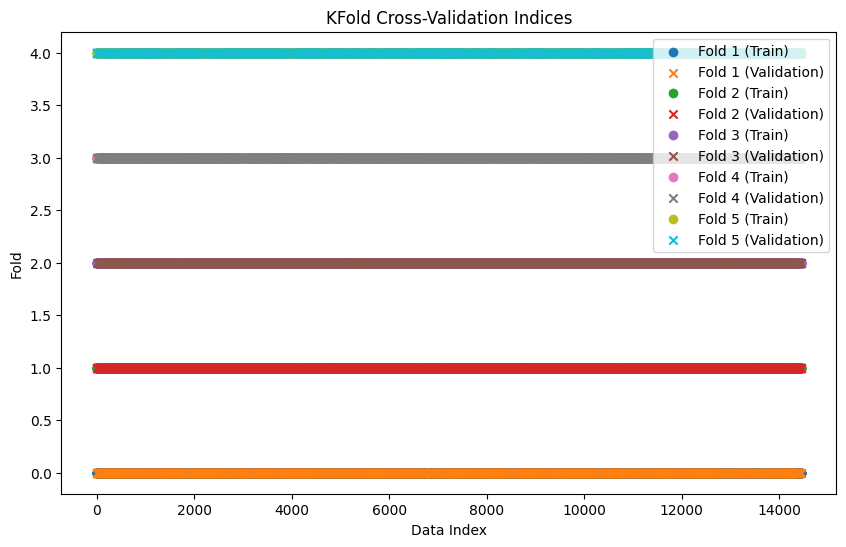

In [37]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Plot the indices for each fold
fig, ax = plt.subplots(figsize=(10, 6))

for fold, (train_index, val_index) in enumerate(kf.split(X_train, Y_train)):
    ax.scatter(train_index, [fold] * len(train_index), label=f'Fold {fold + 1} (Train)', marker='o')
    ax.scatter(val_index, [fold] * len(val_index), label=f'Fold {fold + 1} (Validation)', marker='x')
    print(f"Train Index for fold {fold}", train_index )
    print(f"Val Index for fold {fold}", val_index )
ax.set_xlabel('Data Index')
ax.set_ylabel('Fold')
ax.set_title('KFold Cross-Validation Indices')
ax.legend()
plt.show()
